# **Final Project Kecerdasan Komputasional**
- 5054231009: Rafif Fawwaz Kartika
- 5054231012: Ahnaf Tsabit Attaqi
- 5054231015: Dimas Ahmad Satrio Wicaksono
- 5054231022: Naufal Humam Maulana

## **Atribut dalam Dataset:**

1. **Informasi Pribadi:**
   - **School**: Sekolah siswa  
     - 'GP' = Gabriel Pereira  
     - 'MS' = Mousinho da Silveira  
   - **Sex**: Jenis kelamin siswa  
     - 'F' = Perempuan  
     - 'M' = Laki-laki  
   - **Age**: Usia siswa (15 hingga 22 tahun)  
   - **Address**: Jenis tempat tinggal  
     - 'U' = Urban (perkotaan)  
     - 'R' = Rural (pedesaan)  
   - **Famsize**: Ukuran keluarga  
     - 'LE3' = ≤ 3 anggota  
     - 'GT3' = > 3 anggota  
   - **Pstatus**: Status tinggal orang tua  
     - 'T' = Tinggal bersama  
     - 'A' = Terpisah  

2. **Pendidikan Orang Tua:**
   - **Medu**: Pendidikan ibu  
     - 0 = Tidak ada  
     - 1 = SD (kelas 1-4)  
     - 2 = SMP (kelas 5-9)  
     - 3 = SMA  
     - 4 = Perguruan tinggi  
   - **Fedu**: Pendidikan ayah
     - 0 = Tidak ada  
     - 1 = SD (kelas 1-4)  
     - 2 = SMP (kelas 5-9)  
     - 3 = SMA  
     - 4 = Perguruan tinggi  

3. **Pekerjaan Orang Tua:**
   - **Mjob**: Pekerjaan ibu  
     - 'teacher' = Guru  
     - 'health' = Bidang kesehatan  
     - 'services' = Pekerjaan sipil (administrasi/polisi)  
     - 'at_home' = Ibu rumah tangga  
     - 'other' = Pekerjaan lain  
   - **Fjob**: Pekerjaan ayah
     - 'teacher' = Guru  
     - 'health' = Bidang kesehatan  
     - 'services' = Pekerjaan sipil (administrasi/polisi)  
     - 'at_home' = Ibu rumah tangga  
     - 'other' = Pekerjaan lain  

4. **Alasan dan Pengasuhan:**
   - **Reason**: Alasan memilih sekolah  
     - 'home' = Dekat rumah  
     - 'reputation' = Reputasi sekolah  
     - 'course' = Program studi  
     - 'other' = Alasan lain  
   - **Guardian**: Wali siswa  
     - 'mother' = Ibu  
     - 'father' = Ayah  
     - 'other' = Wali lain  

5. **Waktu dan Kebiasaan Belajar:**
   - **Traveltime**: Waktu tempuh rumah ke sekolah  
     - 1 = <15 menit  
     - 2 = 15–30 menit  
     - 3 = 30 menit–1 jam  
     - 4 = >1 jam  
   - **Studytime**: Waktu belajar mingguan  
     - 1 = <2 jam  
     - 2 = 2–5 jam  
     - 3 = 5–10 jam  
     - 4 = >10 jam  
   - **Failures**: Jumlah kegagalan kelas sebelumnya  
     - Angka antara 1 hingga 3, atau 4 jika lebih dari 3 kali gagal  

6. **Dukungan Pendidikan:**
   - **Schoolsup**: Dukungan tambahan dari sekolah (ya/tidak)  
   - **Famsup**: Dukungan tambahan dari keluarga (ya/tidak)  
   - **Paid**: Kelas tambahan berbayar untuk mata pelajaran tertentu (ya/tidak)  
   - **Activities**: Mengikuti kegiatan ekstrakurikuler (ya/tidak)  
   - **Nursery**: Pernah bersekolah di taman kanak-kanak (ya/tidak)  
   - **Higher**: Ingin melanjutkan ke perguruan tinggi (ya/tidak)  
   - **Internet**: Memiliki akses internet di rumah (ya/tidak)  
   - **Romantic**: Sedang dalam hubungan romantis (ya/tidak)  

7. **Kehidupan dan Aktivitas Harian:**
   - **Famrel**: Kualitas hubungan keluarga (1 = sangat buruk hingga 5 = sangat baik)  
   - **Freetime**: Waktu luang setelah sekolah (1 = sangat rendah hingga 5 = sangat tinggi)  
   - **Goout**: Frekuensi keluar bersama teman (1 = sangat jarang hingga 5 = sangat sering)  
   - **Dalc**: Konsumsi alkohol di hari kerja (1 = sangat rendah hingga 5 = sangat tinggi)  
   - **Walc**: Konsumsi alkohol di akhir pekan (1 = sangat rendah hingga 5 = sangat tinggi)  
   - **Health**: Kondisi kesehatan saat ini (1 = sangat buruk hingga 5 = sangat baik)  
   - **Absences**: Jumlah absensi (0 hingga 93)  

8. **Nilai Akademik (Tujuan Akhir):**
   - **G1**: Nilai pada periode pertama (0–20)  
   - **G2**: Nilai pada periode kedua (0–20)  
   - **G3**: Nilai akhir (0–20, target output)  

In [148]:
!pip install scikit-fuzzy

In [149]:
import os
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [150]:
os.listdir('/kaggle/input/student-alcohol-consumption')

['student-mat.csv', 'student-merge.R', 'student-por.csv']

In [151]:
data1 = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv')
data2 = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-por.csv')

In [152]:
data = pd.concat([data1, data2], axis=0, ignore_index=True)

In [153]:
duplicated = data.duplicated().sum()
print(duplicated)

0


In [154]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [155]:
data.shape

(1044, 33)

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [157]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.494253,0.911714,1.0,1.0,1.0,2.0,5.0


In [158]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [159]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Variables: \n", cat_cols, "\n")
print("Numerical Variables: \n", num_cols, "\n")

Categorical Variables: 
 ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'] 

Numerical Variables: 
 ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'] 



In [160]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64

In [161]:
for i in data.columns:
    if (data[i].nunique() < 50):
        print ("Feature:\t", i, "\n", data[i].unique(), "\n")

Feature:	 school 
 ['GP' 'MS'] 

Feature:	 sex 
 ['F' 'M'] 

Feature:	 age 
 [18 17 15 16 19 22 20 21] 

Feature:	 address 
 ['U' 'R'] 

Feature:	 famsize 
 ['GT3' 'LE3'] 

Feature:	 Pstatus 
 ['A' 'T'] 

Feature:	 Medu 
 [4 1 3 2 0] 

Feature:	 Fedu 
 [4 1 2 3 0] 

Feature:	 Mjob 
 ['at_home' 'health' 'other' 'services' 'teacher'] 

Feature:	 Fjob 
 ['teacher' 'other' 'services' 'health' 'at_home'] 

Feature:	 reason 
 ['course' 'other' 'home' 'reputation'] 

Feature:	 guardian 
 ['mother' 'father' 'other'] 

Feature:	 traveltime 
 [2 1 3 4] 

Feature:	 studytime 
 [2 3 1 4] 

Feature:	 failures 
 [0 3 2 1] 

Feature:	 schoolsup 
 ['yes' 'no'] 

Feature:	 famsup 
 ['no' 'yes'] 

Feature:	 paid 
 ['no' 'yes'] 

Feature:	 activities 
 ['no' 'yes'] 

Feature:	 nursery 
 ['yes' 'no'] 

Feature:	 higher 
 ['yes' 'no'] 

Feature:	 internet 
 ['no' 'yes'] 

Feature:	 romantic 
 ['no' 'yes'] 

Feature:	 famrel 
 [4 5 3 1 2] 

Feature:	 freetime 
 [3 2 4 1 5] 

Feature:	 goout 
 [4 3 2 1 5] 



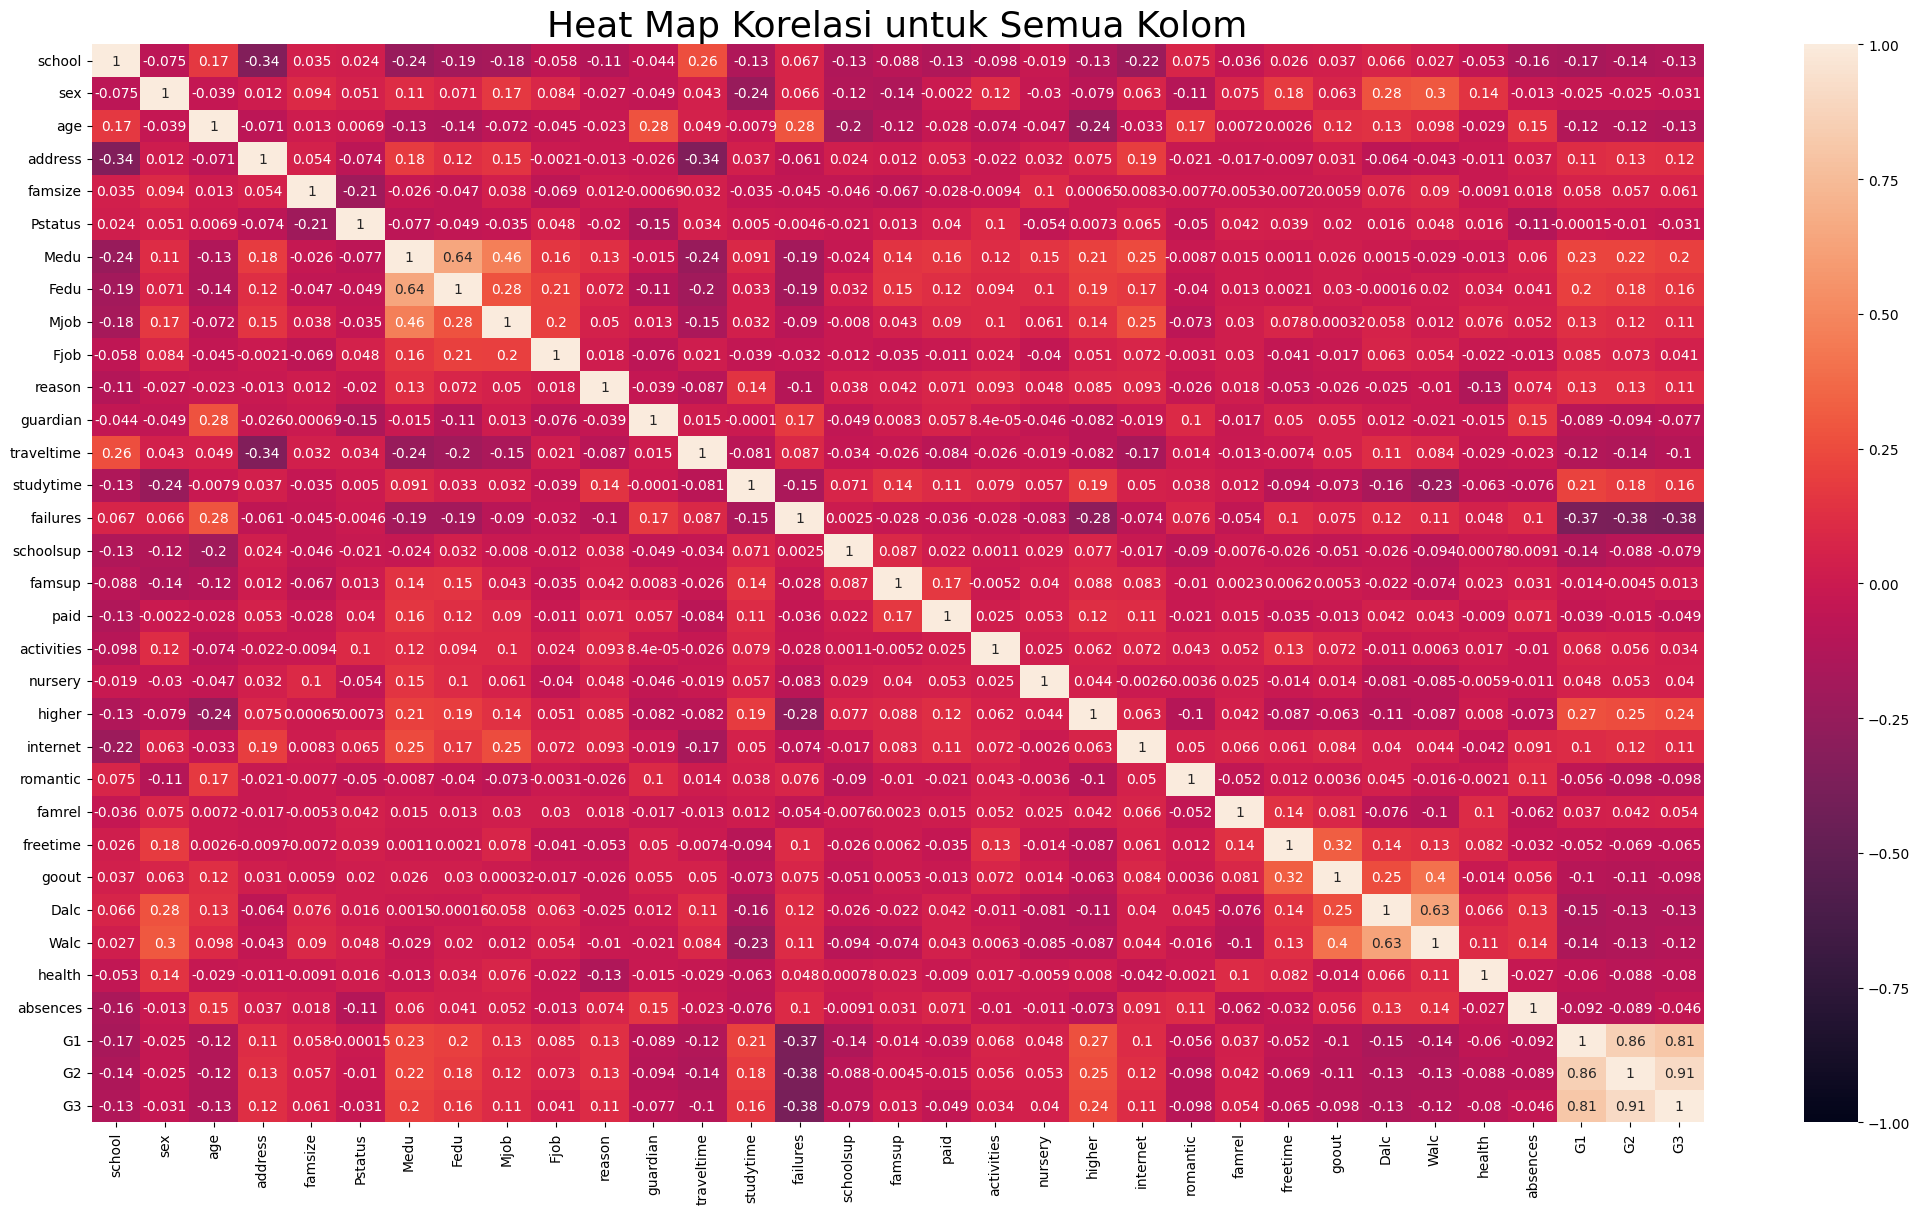

In [162]:
# Heat Map
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

correlation_matrix = data.corr()

plt.figure(figsize=(26, 14))
sns.heatmap(correlation_matrix, annot = True, vmin = -1, vmax = 1)
plt.title(f'Heat Map Korelasi untuk Semua Kolom', fontsize=26)
plt.show()

In [163]:
target_corr = correlation_matrix['G3'].sort_values(ascending=False)
target_corr

G3            1.000000
G2            0.910743
G1            0.809142
higher        0.236578
Medu          0.201472
studytime     0.161629
Fedu          0.159796
address       0.117696
reason        0.108671
internet      0.107064
Mjob          0.105640
famsize       0.061209
famrel        0.054461
Fjob          0.040541
nursery       0.039950
activities    0.033998
famsup        0.013313
Pstatus      -0.030693
sex          -0.031472
absences     -0.045671
paid         -0.049388
freetime     -0.064890
guardian     -0.077320
schoolsup    -0.079346
health       -0.080079
goout        -0.097877
romantic     -0.098363
traveltime   -0.102627
Walc         -0.115740
age          -0.125282
school       -0.127114
Dalc         -0.129642
failures     -0.383145
Name: G3, dtype: float64

In [164]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [165]:
# Pilih fitur input dan target
features = ['G2', 'Medu', 'studytime', 'Dalc']
target = 'G3'
X = data[features].values
Y = data[target].values

In [166]:
# Pisahkan data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Fuzzy Logic (Sugeno)**

### **Variabel Input Fuzzy**

#### 1. **`G2` (Nilai Ujian Kedua):**
   - Rendah (0–10)
   - Sedang (11–15)
   - Tinggi (16–20)

#### 2. **`Medu` (Pendidikan Ibu):**
   - Rendah (0–1)
   - Sedang (2–3)
   - Tinggi (4)

#### 3. **`studytime` (Waktu Belajar Mingguan):**
   - Rendah (<= 1 jam)
   - Sedang (2–3 jam)
   - Tinggi (>= 4 jam)

#### 4. **`Dalc` (Konsumsi Alkohol Harian):**
   - Rendah (1–2)
   - Sedang (3)
   - Tinggi (4–5)

### **Variabel Output Fuzzy**

#### **`G3` (Nilai Akhir):**
   - Rendah (0–10)
   - Sedang (11–15)
   - Tinggi (16–20)

In [167]:
# Definisikan range untuk setiap variabel input dan output
x_G2 = np.arange(0, 21, 1)          # Nilai ujian kedua (0-20)
x_Medu = np.arange(0, 5, 0.1)       # Pendidikan ibu (0-4)
x_studytime = np.arange(1, 5, 0.1)  # Waktu belajar mingguan (1-4)
x_Dalc = np.arange(1, 6, 0.1)       # Konsumsi alkohol harian (1-5)
x_G3 = np.arange(0, 21, 1)          # Nilai akhir (0-20)

In [168]:
# Fungsi keanggotaan untuk G2 (Triangular)
G2_low = fuzz.trimf(x_G2, [0, 0, 10])
G2_medium = fuzz.trimf(x_G2, [5, 10, 15])
G2_high = fuzz.trimf(x_G2, [10, 20, 20])

# Fungsi keanggotaan untuk Medu (Gaussian)
Medu_low = fuzz.gaussmf(x_Medu, 0, 0.8)
Medu_medium = fuzz.gaussmf(x_Medu, 2, 0.8)
Medu_high = fuzz.gaussmf(x_Medu, 4, 0.8)

# Fungsi keanggotaan untuk studytime (Triangular)
studytime_short = fuzz.trimf(x_studytime, [1, 1, 2])
studytime_medium = fuzz.trimf(x_studytime, [1.5, 2.5, 3.5])
studytime_long = fuzz.trimf(x_studytime, [3, 4, 4])

# Fungsi keanggotaan untuk Dalc (Trapezoidal)
Dalc_low = fuzz.trapmf(x_Dalc, [1, 1, 2, 3])
Dalc_medium = fuzz.trapmf(x_Dalc, [2, 3, 3, 4])
Dalc_high = fuzz.trapmf(x_Dalc, [3, 4, 5, 5])

# Fungsi keanggotaan untuk G3 (Gaussian)
G3_low = fuzz.gaussmf(x_G3, 5, 3)
G3_medium = fuzz.gaussmf(x_G3, 10, 3)
G3_high = fuzz.gaussmf(x_G3, 15, 3)

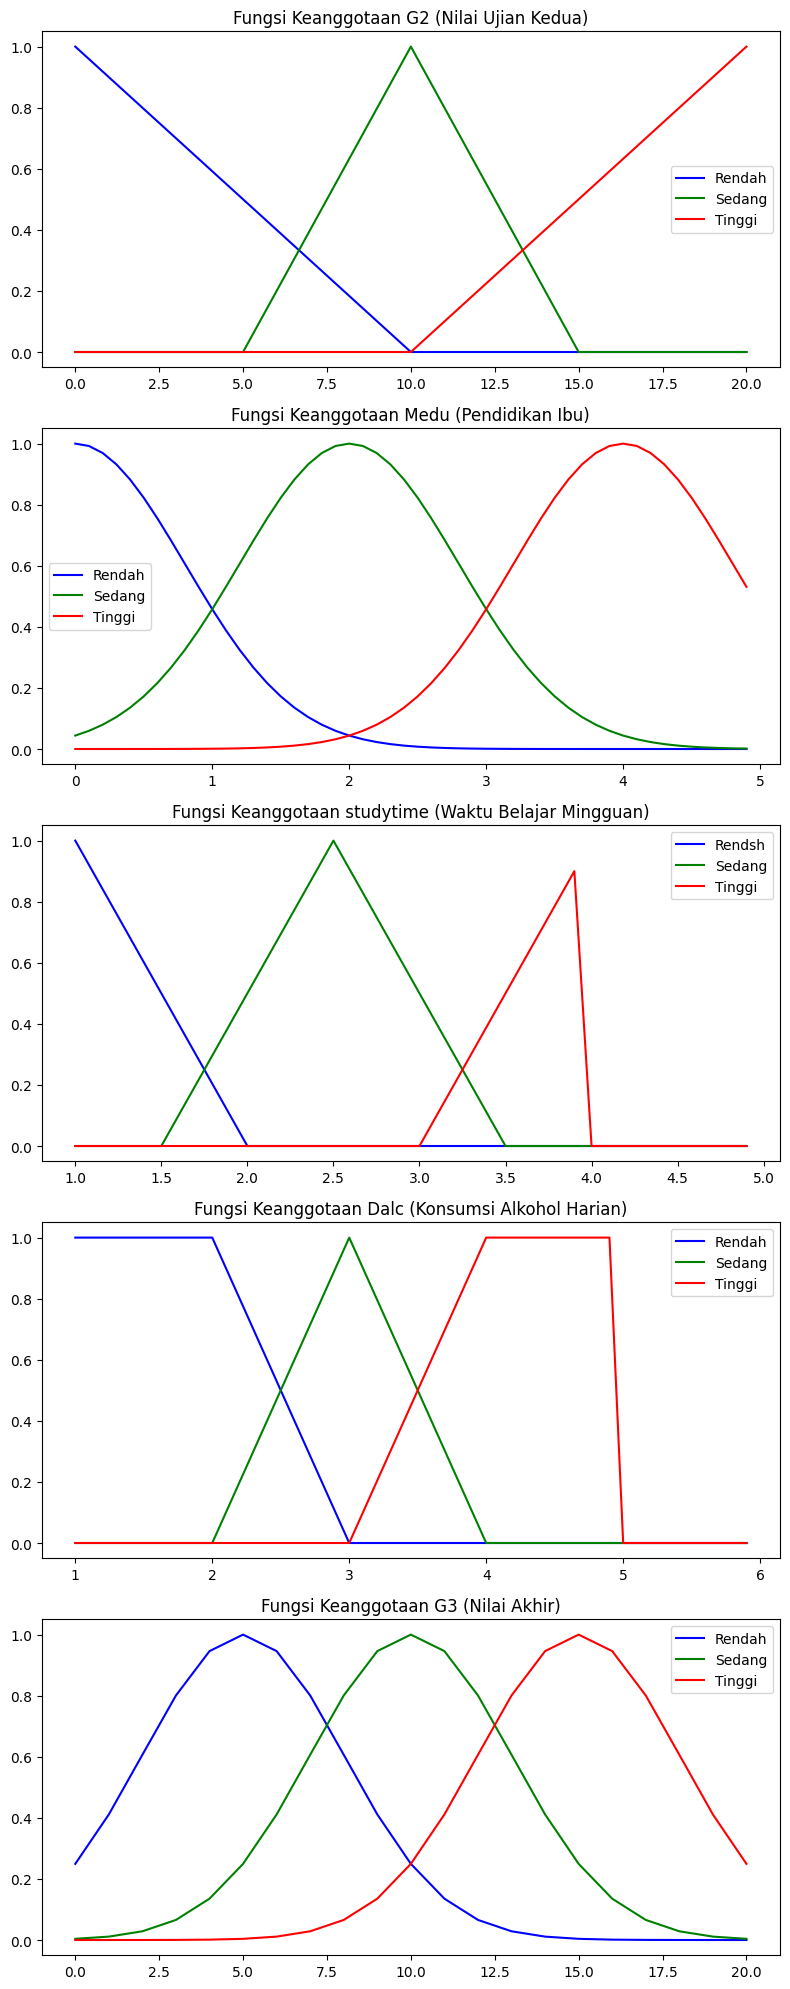

In [169]:
# Plot fungsi keanggotaan
fig, axes = plt.subplots(5, 1, figsize=(8, 20))

# Plot G2
axes[0].plot(x_G2, G2_low, 'b', label='Rendah')
axes[0].plot(x_G2, G2_medium, 'g', label='Sedang')
axes[0].plot(x_G2, G2_high, 'r', label='Tinggi')
axes[0].set_title('Fungsi Keanggotaan G2 (Nilai Ujian Kedua)')
axes[0].legend()

# Plot Medu
axes[1].plot(x_Medu, Medu_low, 'b', label='Rendah')
axes[1].plot(x_Medu, Medu_medium, 'g', label='Sedang')
axes[1].plot(x_Medu, Medu_high, 'r', label='Tinggi')
axes[1].set_title('Fungsi Keanggotaan Medu (Pendidikan Ibu)')
axes[1].legend()

# Plot studytime
axes[2].plot(x_studytime, studytime_short, 'b', label='Rendsh')
axes[2].plot(x_studytime, studytime_medium, 'g', label='Sedang')
axes[2].plot(x_studytime, studytime_long, 'r', label='Tinggi')
axes[2].set_title('Fungsi Keanggotaan studytime (Waktu Belajar Mingguan)')
axes[2].legend()

# Plot Dalc
axes[3].plot(x_Dalc, Dalc_low, 'b', label='Rendah')
axes[3].plot(x_Dalc, Dalc_medium, 'g', label='Sedang')
axes[3].plot(x_Dalc, Dalc_high, 'r', label='Tinggi')
axes[3].set_title('Fungsi Keanggotaan Dalc (Konsumsi Alkohol Harian)')
axes[3].legend()

# Plot G3
axes[4].plot(x_G3, G3_low, 'b', label='Rendah')
axes[4].plot(x_G3, G3_medium, 'g', label='Sedang')
axes[4].plot(x_G3, G3_high, 'r', label='Tinggi')
axes[4].set_title('Fungsi Keanggotaan G3 (Nilai Akhir)')
axes[4].legend()

plt.tight_layout()
plt.show()

### **Aturan Fuzzy**

1. **Jika `G2` rendah dan `Medu` rendah dan `studytime` rendah dan `Dalc` tinggi, maka `G3` rendah.**
2. **Jika `G2` rendah dan `Medu` sedang dan `studytime` sedang dan `Dalc` rendah, maka `G3` sedang.**
3. **Jika `G2` sedang dan `Medu` tinggi dan `studytime` tinggi dan `Dalc` rendah, maka `G3` sedang.**
4. **Jika `G2` tinggi dan `Medu` tinggi dan `studytime` tinggi dan `Dalc` rendah, maka `G3` tinggi.**
5. **Jika `G2` sedang dan `Medu` sedang dan `studytime` rendah dan `Dalc` sedang, maka `G3` rendah.**
6. **Jika `G2` tinggi dan `Medu` rendah dan `studytime` rendah dan `Dalc` tinggi, maka `G3` sedang.**
7. **Jika `G2` tinggi dan `Medu` sedang dan `studytime` tinggi dan `Dalc` sedang, maka `G3` tinggi.**
8. **Jika `G2` sedang dan `Medu` rendah dan `studytime` sedang dan `Dalc` sedang, maka `G3` sedang.**

### **Defuzzifikasi (Sugeno)**

**Aturan:**
- $w = \text{Bobot per aturan (Rule)}$
- $r = \text{Input per aturan}$

Rumus untuk $r$:  
$
r = a \cdot G2 + b \cdot \text{Medu} + c \cdot \text{studytime} - d \cdot \text{Dalc} + k
$

Rumus untuk hasil defuzzifikasi $G3$:  
$
G3 = \frac{w_1 \cdot z_1 + w_2 \cdot z_2 + w_3 \cdot z_3 + w_4 \cdot z_4 + w_5 \cdot z_5 + w_6 \cdot z_6 + w_7 \cdot z_7 + w_8 \cdot z_8}{w_1 + w_2 + w_3 + w_4 + w_5 + w_6 + w_7 + w_8}
$

In [170]:
predictions = []

# Ambil nilai input untuk setiap iterasi
for i in range(len(X_test)):
    G2_input = X_test[i, 0]         # G2
    Medu_input = X_test[i, 1]       # Medu
    studytime_input = X_test[i, 2]  # studytime
    Dalc_input = X_test[i, 3]       # Dalc

    # Derajat keanggotaan dari input
    G2_low_degree = fuzz.interp_membership(x_G2, G2_low, G2_input)
    G2_medium_degree = fuzz.interp_membership(x_G2, G2_medium, G2_input)
    G2_high_degree = fuzz.interp_membership(x_G2, G2_high, G2_input)

    Medu_low_degree = fuzz.interp_membership(x_Medu, Medu_low, Medu_input)
    Medu_medium_degree = fuzz.interp_membership(x_Medu, Medu_medium, Medu_input)
    Medu_high_degree = fuzz.interp_membership(x_Medu, Medu_high, Medu_input)

    studytime_short_degree = fuzz.interp_membership(x_studytime, studytime_short, studytime_input)
    studytime_medium_degree = fuzz.interp_membership(x_studytime, studytime_medium, studytime_input)
    studytime_long_degree = fuzz.interp_membership(x_studytime, studytime_long, studytime_input)

    Dalc_low_degree = fuzz.interp_membership(x_Dalc, Dalc_low, Dalc_input)
    Dalc_medium_degree = fuzz.interp_membership(x_Dalc, Dalc_medium, Dalc_input)
    Dalc_high_degree = fuzz.interp_membership(x_Dalc, Dalc_high, Dalc_input)

    # Aturan Fuzzy
    rule1 = np.fmin(np.fmin(np.fmin(G2_low_degree, Medu_low_degree), studytime_short_degree), Dalc_high_degree)  # G3 rendah
    rule2 = np.fmin(np.fmin(np.fmin(G2_low_degree, Medu_medium_degree), studytime_medium_degree), Dalc_low_degree)  # G3 sedang
    rule3 = np.fmin(np.fmin(np.fmin(G2_medium_degree, Medu_high_degree), studytime_long_degree), Dalc_low_degree)  # G3 sedang
    rule4 = np.fmin(np.fmin(np.fmin(G2_high_degree, Medu_high_degree), studytime_long_degree), Dalc_low_degree)  # G3 tinggi
    rule5 = np.fmin(np.fmin(np.fmin(G2_medium_degree, Medu_medium_degree), studytime_short_degree), Dalc_medium_degree)  # G3 rendah
    rule6 = np.fmin(np.fmin(np.fmin(G2_high_degree, Medu_low_degree), studytime_short_degree), Dalc_high_degree)  # G3 sedang
    rule7 = np.fmin(np.fmin(np.fmin(G2_high_degree, Medu_medium_degree), studytime_long_degree), Dalc_medium_degree)  # G3 tinggi
    rule8 = np.fmin(np.fmin(np.fmin(G2_medium_degree, Medu_low_degree), studytime_medium_degree), Dalc_medium_degree)  # G3 sedang

    # Definisi koefisien fungsi Sugeno
    r, s, t, c = 0.2, 0.5, 1.0, 5.0

    # Perhitungan output untuk setiap aturan
    z1 = r * G2_input + r * Medu_input + r * studytime_input - t * Dalc_input + c  # Rendah
    z2 = r * G2_input + s * Medu_input + s * studytime_input - r * Dalc_input + c  # Sedang
    z3 = s * G2_input + t * Medu_input + t * studytime_input - r * Dalc_input + c  # Sedang
    z4 = t * G2_input + t * Medu_input + t * studytime_input - r * Dalc_input + c  # Tinggi
    z5 = s * G2_input + s * Medu_input + r * studytime_input - s * Dalc_input + c  # Rendah
    z6 = t * G2_input + r * Medu_input + r * studytime_input - t * Dalc_input + c  # Sedang
    z7 = t * G2_input + s * Medu_input + t * studytime_input - s * Dalc_input + c  # Tinggi
    z8 = s * G2_input + r * Medu_input + s * studytime_input - s * Dalc_input + c  # Sedang

    # Bobot total untuk setiap aturan
    w1, w2, w3, w4, w5, w6, w7, w8 = rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8

    # Menggabungkan semua aturan menggunakan metode Sugeno
    G3 = (w1 * z1 + w2 * z2 + w3 * z3 + w4 * z4 + w5 * z5 + w6 * z6 + w7 * z7 + w8 * z8) / (w1 + w2 + w3 + w4 + w5 + w6 + w7 + w8)

    # Simpan hasil prediksi
    predictions.append([G2_input, Medu_input, studytime_input, Dalc_input, G3])

    # Output hasil untuk setiap iterasi
    print(f"Iterasi {i+1}; G2: {G2_input}, Medu: {Medu_input}, studytime: {studytime_input}, Dalc: {Dalc_input} -> Prediksi G3: {G3:.2f}")

Iterasi 1; G2: 10, Medu: 3, studytime: 1, Dalc: 5 -> Prediksi G3: nan
Iterasi 2; G2: 8, Medu: 4, studytime: 1, Dalc: 2 -> Prediksi G3: 10.20
Iterasi 3; G2: 13, Medu: 1, studytime: 2, Dalc: 1 -> Prediksi G3: nan
Iterasi 4; G2: 11, Medu: 4, studytime: 2, Dalc: 1 -> Prediksi G3: nan
Iterasi 5; G2: 12, Medu: 3, studytime: 3, Dalc: 1 -> Prediksi G3: 19.80
Iterasi 6; G2: 12, Medu: 3, studytime: 1, Dalc: 2 -> Prediksi G3: 11.70
Iterasi 7; G2: 6, Medu: 2, studytime: 1, Dalc: 1 -> Prediksi G3: nan
Iterasi 8; G2: 11, Medu: 2, studytime: 2, Dalc: 1 -> Prediksi G3: nan
Iterasi 9; G2: 14, Medu: 1, studytime: 3, Dalc: 1 -> Prediksi G3: 19.30
Iterasi 10; G2: 13, Medu: 4, studytime: 3, Dalc: 1 -> Prediksi G3: 21.55
Iterasi 11; G2: 15, Medu: 4, studytime: 3, Dalc: 1 -> Prediksi G3: 26.80
Iterasi 12; G2: 7, Medu: 2, studytime: 2, Dalc: 1 -> Prediksi G3: 8.20
Iterasi 13; G2: 7, Medu: 3, studytime: 1, Dalc: 1 -> Prediksi G3: nan
Iterasi 14; G2: 10, Medu: 2, studytime: 1, Dalc: 5 -> Prediksi G3: nan
Iteras

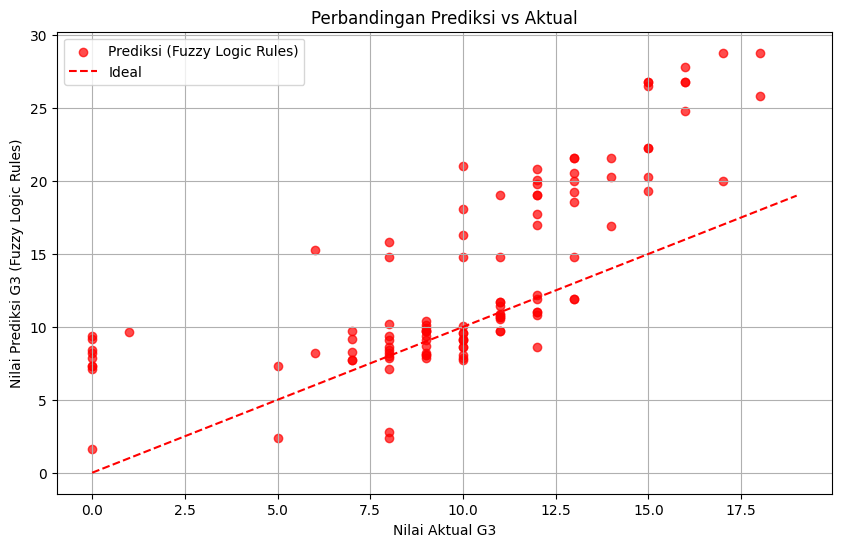

In [171]:
# Visualisasi Prediksi vs Aktual (Fuzzy Logic Rules)
G3_pred = np.array([pred[4] for pred in predictions]) 

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, G3_pred, color='red', alpha=0.7, label='Prediksi (Fuzzy Logic Rules)')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Nilai Aktual G3')
plt.ylabel('Nilai Prediksi G3 (Fuzzy Logic Rules)')
plt.title('Perbandingan Prediksi vs Aktual')
plt.legend()
plt.grid(True)
plt.show()

In [172]:
# Konversi hasil ke dalam bentuk data tabular
table = pd.DataFrame(predictions, columns=['G2', 'Medu', 'studytime', 'Dalc', 'Prediksi G3'])

table.head(10)

,G2,Medu,studytime,Dalc,Prediksi G3
0,10,3,1,5,NaN
1,8,4,1,2,10.20
2,13,1,2,1,NaN
3,11,4,2,1,NaN
4,12,3,3,1,19.80
5,12,3,1,2,11.70
6,6,2,1,1,NaN
7,11,2,2,1,NaN
8,14,1,3,1,19.30
9,13,4,3,1,21.55


# **Particle Swarm Optimization (PSO)**

### **Fungsi Objektif untuk PSO**
Fungsi objektif akan mengukur kesalahan antara nilai prediksi (`G3_pred`) dan nilai aktual (`G3_actual`). Biasanya menggunakan **Mean Squared Error (MSE)**:

$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (G3_{pred_i} - G3_{actual_i})^2
$

In [173]:
# Fungsi Objektif untuk PSO (Mean Squared Error)
def objective_function(weights):
    G3_pred = np.dot(X_train, weights[:4]) - weights[4]  # Prediksi G3
    mse = np.mean((G3_pred - Y_train) ** 2)
    return mse

In [174]:
# PSO Optimasi Parameter
n_particles = 20
n_dimensions = 5
max_iter = 500
w = 0.5
c1 = 1.5
c2 = 2.0

In [175]:
positions = np.random.uniform(-1, 1, (n_particles, n_dimensions))
velocities = np.random.uniform(-0.1, 0.1, (n_particles, n_dimensions))
personal_best_positions = positions.copy()
personal_best_scores = np.full(n_particles, np.inf)
global_best_position = None
global_best_score = np.inf

In [176]:
for iteration in range(max_iter):
    for i in range(n_particles):
        fitness = objective_function(positions[i])
        if fitness < personal_best_scores[i]:
            personal_best_scores[i] = fitness
            personal_best_positions[i] = positions[i]
        if fitness < global_best_score:
            global_best_score = fitness
            global_best_position = positions[i]
    for i in range(n_particles):
        r1, r2 = np.random.rand(), np.random.rand()
        cognitive = c1 * r1 * (personal_best_positions[i] - positions[i])
        social = c2 * r2 * (global_best_position - positions[i])
        velocities[i] = w * velocities[i] + cognitive + social
        positions[i] += velocities[i]
    print(f"Iterasi {iteration + 1}, Best Score: {global_best_score:.4f}")

print("\nHasil Optimasi PSO:")
print("Bobot Optimal (w1, w2, w3, w4):", global_best_position[:4])
print("Bias Optimal (c):", global_best_position[4])

Iterasi 1, Best Score: 3.3963
Iterasi 2, Best Score: 3.3417
Iterasi 3, Best Score: 3.2901
Iterasi 4, Best Score: 3.2901
Iterasi 5, Best Score: 2.9248
Iterasi 6, Best Score: 2.7487
Iterasi 7, Best Score: 2.6831
Iterasi 8, Best Score: 2.6831
Iterasi 9, Best Score: 2.6831
Iterasi 10, Best Score: 2.6066
Iterasi 11, Best Score: 2.6066
Iterasi 12, Best Score: 2.6066
Iterasi 13, Best Score: 2.6066
Iterasi 14, Best Score: 2.5970
Iterasi 15, Best Score: 2.5970
Iterasi 16, Best Score: 2.5970
Iterasi 17, Best Score: 2.5970
Iterasi 18, Best Score: 2.5970
Iterasi 19, Best Score: 2.5672
Iterasi 20, Best Score: 2.5672
Iterasi 21, Best Score: 2.5548
Iterasi 22, Best Score: 2.5548
Iterasi 23, Best Score: 2.5548
Iterasi 24, Best Score: 2.5431
Iterasi 25, Best Score: 2.5415
Iterasi 26, Best Score: 2.5221
Iterasi 27, Best Score: 2.5098
Iterasi 28, Best Score: 2.5008
Iterasi 29, Best Score: 2.4975
Iterasi 30, Best Score: 2.4970
Iterasi 31, Best Score: 2.4948
Iterasi 32, Best Score: 2.4926
Iterasi 33, Best 


Evaluasi pada Data Uji:
MSE: 3.0051
MAE: 0.9048
R^2: 0.8056


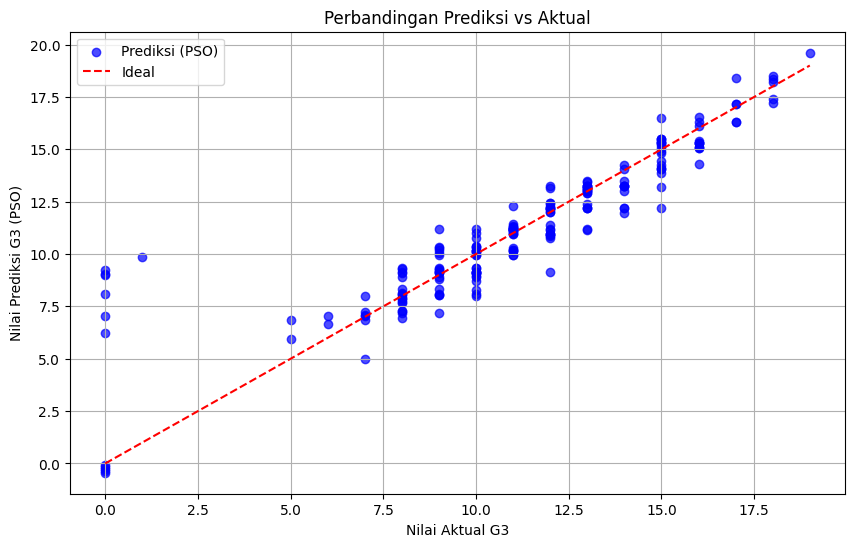

In [177]:
# Validasi dengan Data Uji
G3_test_pred = np.dot(X_test, global_best_position[:4]) - global_best_position[4]

# Evaluasi
mse_test = np.mean((G3_test_pred - Y_test) ** 2)
mae_test = np.mean(np.abs(G3_test_pred - Y_test))
r2_test = 1 - (np.sum((G3_test_pred - Y_test) ** 2) / np.sum((Y_test - np.mean(Y_test)) ** 2))

print("\nEvaluasi pada Data Uji:")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R^2: {r2_test:.4f}")

# Visualisasi Prediksi vs Aktual (PSO)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, G3_test_pred, color='blue', alpha=0.7, label='Prediksi (PSO)')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Nilai Aktual G3')
plt.ylabel('Nilai Prediksi G3 (PSO)')
plt.title('Perbandingan Prediksi vs Aktual')
plt.legend()
plt.grid(True)
plt.show()

### **Defuzzifikasi (Sugeno)**
Rumus untuk hasil defuzzifikasi $G3$ (menggunakan bobot dan bias optimal dari **PSO**): 
$
G3 = w_1 \cdot G2 + w_2 \cdot Medu + w_3 \cdot studytime - w_4 \cdot Dalc + c
$

In [178]:
# Fuzzy Logic Sugeno Prediction
def fuzzy_predict(G2, Medu, studytime, Dalc, weights):
    w1, w2, w3, w4, c = weights
    return w1 * G2 + w2 * Medu + w3 * studytime - w4 * Dalc + c

# Evaluasi dengan Fuzzy Logic
G3_test_pred_fuzzy = []
for i in range(len(X_test)):
    G3_test_pred_fuzzy.append(fuzzy_predict(X_test[i, 0],  # G2
                                            X_test[i, 1],  # Medu
                                            X_test[i, 2],  # studytime
                                            X_test[i, 3],  # Dalc
                                            global_best_position))  # PSO weights


Evaluasi Model Fuzzy Logic Sugeno:
MSE: 3.2414
MAE: 1.0782
R^2: 0.7903


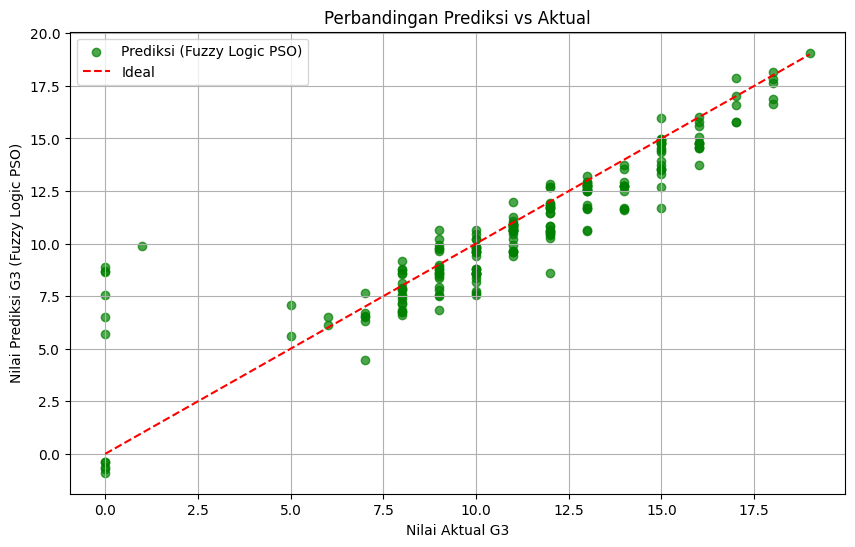

In [179]:
# Evaluasi Prediksi Fuzzy Logic
mse_fuzzy = np.mean((np.array(G3_test_pred_fuzzy) - Y_test) ** 2)
mae_fuzzy = np.mean(np.abs(np.array(G3_test_pred_fuzzy) - Y_test))
r2_fuzzy = 1 - (np.sum((np.array(G3_test_pred_fuzzy) - Y_test) ** 2) / np.sum((Y_test - np.mean(Y_test)) ** 2))

print("\nEvaluasi Model Fuzzy Logic Sugeno:")
print(f"MSE: {mse_fuzzy:.4f}")
print(f"MAE: {mae_fuzzy:.4f}")
print(f"R^2: {r2_fuzzy:.4f}")

# Visualisasi Prediksi vs Aktual (Fuzzy Logic PSO)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, G3_test_pred_fuzzy, color='green', alpha=0.7, label='Prediksi (Fuzzy Logic PSO)')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Nilai Aktual G3')
plt.ylabel('Nilai Prediksi G3 (Fuzzy Logic PSO)')
plt.title('Perbandingan Prediksi vs Aktual')
plt.legend()
plt.grid(True)
plt.show()

In [180]:
# Konversi hasil ke dalam bentuk data tabular
data_predict = np.hstack((X_test, np.array(G3_test_pred_fuzzy).reshape(-1, 1)))
table2 = pd.DataFrame(data_predict, columns=['G2', 'Medu', 'studytime', 'Dalc', 'Prediksi G3'])

table2.head(10)

,G2,Medu,studytime,Dalc,Prediksi G3
0,10.0,3.0,1.0,5.0,10.197267
1,8.0,4.0,1.0,2.0,7.824887
2,13.0,1.0,2.0,1.0,12.732604
3,11.0,4.0,2.0,1.0,10.622626
4,12.0,3.0,3.0,1.0,11.469607
5,12.0,3.0,1.0,2.0,11.967966
6,6.0,2.0,1.0,1.0,5.694068
7,11.0,2.0,2.0,1.0,10.653377
8,14.0,1.0,3.0,1.0,13.564210
9,13.0,4.0,3.0,1.0,12.486158
